In [1]:
%matplotlib inline

In [2]:
# Imports for the Perlin noise implementation
import numpy as np
import matplotlib.pyplot as plot

# Perlin Noise (Implementation and Description)
##### Author: Deyan Sirakov 

### 1. What is Perlin Noise?
So, what is Perlin Noise? One of the most important algorithms in computer graphics and procedural generation is called Perlin Noise. Perlin Noise is an algorithm that generates textures and terrain-like images procedurally (without the need for an artist to manually create the images). Ken Perlin is the creator of this algorithm, for which he also won an Academy Award in 1997. What differs the normal white noise from Perlin Noise? Well, Perlin Noise looks far more natural. This noise is most widely used in game development, where it helps generating more natural looking objects while using random numbers. Noise functions in such cases help in generating "noise" i.e random numbers by generating random variations in computer-generated models. 

#### Fractals
Completely random noise or numbers that are completely random in the computer-generated model don't look that natural. This happens, because even though most natural looking objects have some randomness in their texture, they still have a structure. Different natural looking objects also have repeating patterns. "At different scales, we see different repeating patterns and these patterns are many times similar to each other at different scales.". This is also known as self-similarity. The concept of **Fractals** deals with self-similar patterns. In such cases, Perlin noise helps in generating pseudo-random variations. It generates numbers that appear random but aren't actually, which helps to give computer-generated models a more natural appearance.

#### The Algorithm
Let's create a Perlin Noise graph in 2D. Consider a pixel point Z, which is a scalar value. We create a grid with many scalar values like Z, as shown below.

![z as scalar value](pn-1.png)

Assume that the image we generate looks like the grid in the image below.

![grid](pn-2.png)

Then for each of these vectors we asign a random gradient vector, which points to a random direction. In the image below, we can see that each point will have four gradient vectors in 2D. All gradient vectors in this case have a consistent length, usually of 1. So four gradient vectors will bound every pixel point like Z.

![vectors](pn-3.png)

Each gradient vector appears random but is in reality pseudorandom in nature and generates the same gradient value every time we calculate using the Perlin algorithm.

We calculate the distance vectors that start from the respective point on the grid to the subsequent gradient vectors surrounding it. To calculate this we subtract the point value of the gradient from the point on the grid.

![distance](pn-4.png)

The Perlin graph is almost done, but it won't be smooth in appearance. To do that, we apply the smooth function, given by this equation:

$$ 6t^5 - 15t^4 + 10t^3 $$

The first-order derivative and the second-order derivative both are zero for this function. This helps to give the generated image/model more smooth appearance over time.

After applying this function to the distance vector coordinates of each pixel inside the grid, we then calculate the gradient vectors. In the end, we use linear interpolation, which is just the dot product of the gradient vectors with the distance vectors.

### 2. Implementation

In [3]:
# Function to create the linear interpolation (dot product)
def lerp(a, b, x):
    return a + x * (b - a)

In [4]:
# The smoothing function from above
def fade(f):
    return 6 * f**5 - 15 * f**4 + 10 * f**3

In [5]:
# Calculate the gradient vectors and the dot product
def gradient(c, x, y):
    vectors = np.array([[0, 1], [0, -1], [1, 0], [-1, 0]])
    gradient_co = vectors[c % 4]
    return gradient_co[:, :, 0] * x + gradient_co[:, :, 1] * y

In [6]:
# Create evenly spaced out numbers in a specified interval
lin_array = np.linspace(1, 10, 500, endpoint=False)

# Create a grid using linear 1D arrays
x, y = np.meshgrid(lin_array, lin_array)

In [7]:
# Create a permutation table, based on the number of pixels
def p_noise(x, y, seed=0):
    np.random.seed(seed) # Seed is the initial value we want to start with. This helps to keep the perlin graph smooth
    ptable = np.arange(256, dtype=int)
    
    # Shuffle our numbers in the table
    np.random.shuffle(ptable)
    
    # Create a 2D array and turn it one dimensional, so that we can apply our dot product interpolations easily
    ptable = np.stack([ptable, ptable]).flatten()
    
    # Grid coordinates
    xi, yi = x.astype(int), y.astype(int)
    
    # Distance the vector coordinates
    xg, yg = x - xi, y - yi
    
    # Apply the fade function to distance the coordinates
    xf, yf = fade(xg), fade(yg)
    
    # The gradient vector coordinates in the top left, top right, bottom left and bottom right
    n00 = gradient(ptable[ptable[xi] + yi], xg, yg)
    n01 = gradient(ptable[ptable[xi] + yi + 1], xg, yg - 1)
    n11 = gradient(ptable[ptable[xi + 1] + yi + 1], xg - 1, yg - 1)
    n10 = gradient(ptable[ptable[xi + 1] + yi], xg - 1, yg)
    
    # Apply the linear interpolation 
    x1 = lerp(n00, n10, xf)
    x2 = lerp(n01, n11, xf)
    return lerp(x1, x2, yf)

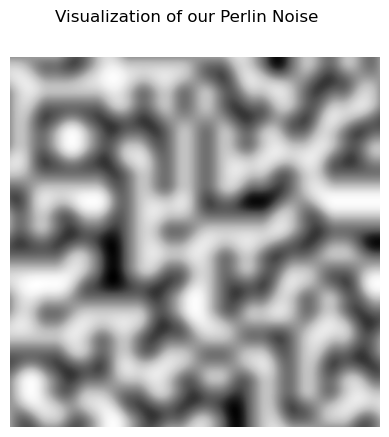

In [9]:
# Generate the graph
plot.imshow(p_noise(x, y, seed=1), origin='upper', cmap = 'Greys')
plot.axis('off')
plot.suptitle('Visualization of our Perlin Noise')

plot.show()

#### And here we go! We have just implemented Perlin Noise! :)